In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Tugas Akhir"

In [ ]:
import pandas as pd
import os

data = pd.read_csv(os.path.join(path, "preprocessed_data.csv"), encoding="latin-1")

In [ ]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,saat semua cowok berusaha melacak perhatian gu...,1,1,1,0,0,0,0,0,1
1,siapa telat memberi tau kamu edan sarap gue be...,0,1,0,0,0,0,0,0,0
2,kadang aku berpikir aku tetap percaya tuhan pa...,0,0,0,0,0,0,0,0,0
3,aku aku ku tau matamu sipit dilihat mana aku,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir kelihatan dongoknya awal tam...,1,1,0,1,1,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Daftar kolom label
label_cols = ['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
              'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']

# Hitung jumlah 1 pada setiap label
label_counts = data[label_cols].sum().sort_values(ascending=False)

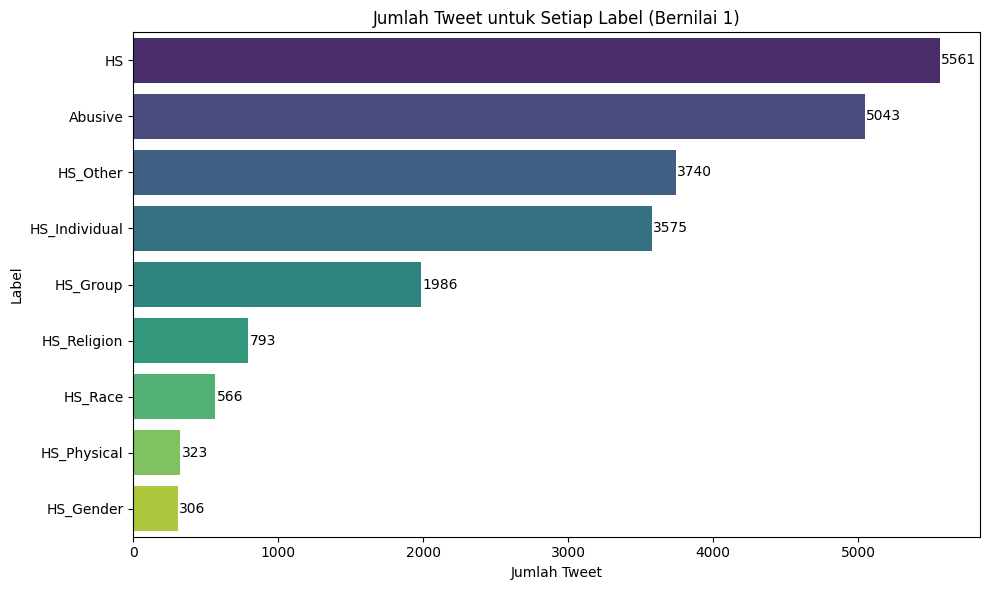

In [ ]:
# Visualisasi
plt.figure(figsize=(10,6))
ax = sns.barplot(x=label_counts.values, y=label_counts.index, hue=label_counts.index, palette='viridis', legend=False)
plt.title('Jumlah Tweet untuk Setiap Label (Bernilai 1)')
plt.xlabel('Jumlah Tweet')
plt.ylabel('Label')

# Menambahkan jumlah exact di atas setiap bar
for index, value in enumerate(label_counts.values):
    plt.text(value + 10, index, str(value), ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Pastikan kolom jumlah_label sudah ada
data['jumlah_label'] = data[label_cols].sum(axis=1)

# Ambil semua nilai unik dari jumlah_label (distribusi multi-label)
jumlah_label_values = sorted(data['jumlah_label'].unique())

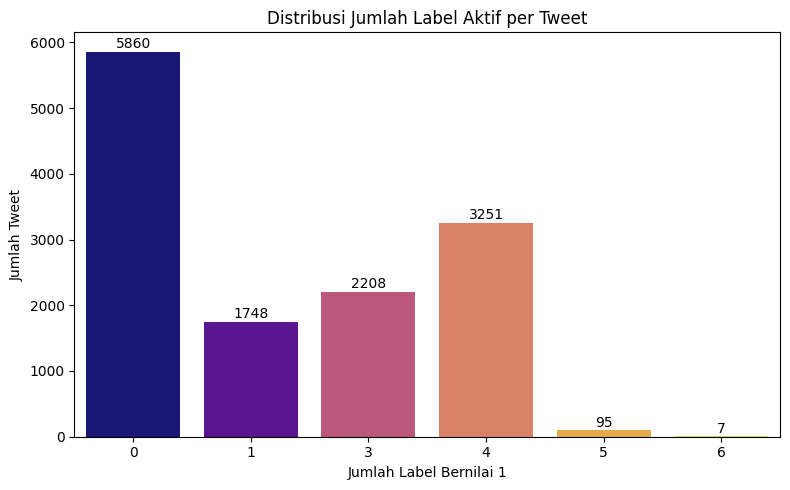

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='jumlah_label', hue='jumlah_label', palette='plasma', legend=False)

# Tambahkan label jumlah di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center', va='bottom')

# Tambahkan judul dan label sumbu
plt.title('Distribusi Jumlah Label Aktif per Tweet')
plt.xlabel('Jumlah Label Bernilai 1')
plt.ylabel('Jumlah Tweet')
plt.tight_layout()
plt.show()

In [ ]:
# Tampilkan contoh tweet untuk setiap nilai jumlah_label
for val in jumlah_label_values:
    print(f"\n=== Contoh Tweet dengan {int(val)} label aktif ===")
    contoh = data[data['jumlah_label'] == val].sample(3, random_state=42)
    for idx, row in contoh.iterrows():
        print(f"[Index: {idx}] - {row['Tweet']}")


=== Contoh Tweet dengan 0 label aktif ===
[Index: 462] - pernah melakukan dosa apa anis sandi bully di rendahkan terus terusan padahal banyak orang jahat licik sebenarnya lebih pantas di bully rendahkan dunia memang kejam kawan
[Index: 1752] - sebelumnya bank badan usaha milik negara tersebut meminjam uang cina publik pemerintah mengatakan pinjaman tersebut bangun infrastruktur nyatanya sebagian besar digunakan memfasilitasi cina menguasai newmont adalah perbuatan kongkalikong
[Index: 669] - onta bukan aku

=== Contoh Tweet dengan 1 label aktif ===
[Index: 13069] - jijik bodoh
[Index: 10324] - kencan eh kamu tau orang gila di rumah gue kemarin kan gue menyapu pas sampai teras gue lihat lagi buka celana memegang titit x9
[Index: 4646] - bajingan lah bukan bajingan

=== Contoh Tweet dengan 3 label aktif ===
[Index: 12238] - pemimpin pribumi pilih pemimpin impor tidak beradab tukang berbohong yuk pribumikan daerah khusus ibukota milik bangsa indonesia
[Index: 6562] - kasihan warga daerah

In [ ]:
# Target total sekitar 1500 tweet, dengan rasio 70:30
target_total = 1500
target_nonaktif = int(target_total * 0.3)
target_aktif = target_total - target_nonaktif

# Ambil sampel untuk tweet non-aktif (jumlah_label = 0)
nonaktif_df = data[data['jumlah_label'] == 0].sample(n=target_nonaktif, random_state=42)

# Ambil sampel untuk tweet aktif
aktif_pool = data[data['jumlah_label'] >= 1]
aktif_df = aktif_pool.sample(n=target_aktif, random_state=42)

# Gabungkan
mini_df = pd.concat([nonaktif_df, aktif_df])

# Seimbangkan label minoritas di rentang 150–200
minority_labels = ['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']
target_per_label = 180

for label in minority_labels:
    current_count = mini_df[label].sum()

    if current_count < target_per_label:
        needed = target_per_label - current_count
        extra = data[
            (data[label] == 1) &
            (~data.index.isin(mini_df.index))
        ].sample(n=needed, random_state=42)
        mini_df = pd.concat([mini_df, extra])

    elif current_count > target_per_label:
        label_rows = mini_df[mini_df[label] == 1]
        keep_rows = label_rows.sample(n=target_per_label, random_state=42)
        non_label_rows = mini_df[mini_df[label] == 0]
        mini_df = pd.concat([keep_rows, non_label_rows])

# Cleanup
mini_df = mini_df.drop_duplicates().reset_index(drop=True)

# Output akhir
print("Distribusi setiap label dalam mini dataset:")
print(mini_df[label_cols].sum())

print("\nDistribusi jumlah label aktif per tweet:")
print(mini_df['jumlah_label'].value_counts().sort_index())

print(f"\nJumlah total tweet dalam mini dataset: {len(mini_df)}")

Distribusi setiap label dalam mini dataset:
HS               854
Abusive          834
HS_Individual    515
HS_Group         339
HS_Religion      212
HS_Race          180
HS_Physical      183
HS_Gender        178
HS_Other         180
dtype: int64

Distribusi jumlah label aktif per tweet:
jumlah_label
0    448
1    256
3    251
4    553
5     46
6      4
Name: count, dtype: int64

Jumlah total tweet dalam mini dataset: 1558


In [ ]:
# mengacak urutan data
mini_df = mini_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
mini_df.head(25)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,tulisan kamu gue bisa dipahami sama gue soalny...,1,1,1,0,0,0,1,0,0
1,semua suku bangsa melakukan tidak terkecuali a...,0,0,0,0,0,0,0,0,0
2,kalau yang bilang jangan bawa bawa agama maksu...,0,0,0,0,0,0,0,0,0
3,pintar itu tugas utama pemerintah coba belajar...,0,0,0,0,0,0,0,0,0
4,kata cebong dolar naik ngaruhmatamu picek #gan...,1,1,1,0,0,0,1,0,0
5,jilati memek aku dong mau,0,1,0,0,0,0,0,0,0
6,tetap fokus bersama kang menangkan pasangan #a...,0,0,0,0,0,0,0,0,0
7,jadi kan aku tempat pelampiasan nafsu mu sayan...,0,1,0,0,0,0,0,0,0
8,yf siapapun ngewe ayo sebal banget gue,0,1,0,0,0,0,0,0,0
9,muntah muntah usai makan seorang banci mengaku...,0,0,0,0,0,0,0,0,0


In [ ]:
mini_df = mini_df.drop(columns=['jumlah_label'])

In [ ]:
mini_df.to_csv("mini_preprocessed_data.csv", index=False)

In [ ]:
# # salin mini_df ke google drive
# import shutil

# shutil.copy("mini_preprocessed_data.csv", "/content/drive/MyDrive/Colab Notebooks/Tugas Akhir/mini_preprocessed_data.csv")